In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from collections import Counter
from ipywidgets import widgets
%matplotlib inline

In [2]:
def top_trending_items(x, column):
    list_data = []
    for data1 in data[column]:
        list_data = list_data + ast.literal_eval(data1)

    dict_items = Counter(list_data)
    df1 = pd.DataFrame.from_dict(dict_items, orient='index').sort_values(0, ascending=False).head(x)
    print(df1)
    ax = df1.plot(kind = 'bar')
    #lt.yticks(range(8000,10000,200))
    plt.xlabel('Items')
    plt.ylabel('most frequently sold items')
    #lt.axis([0, 6, 0, 20])
    ax.set(ylim = (8500,10000))
    plt.show()

In [3]:
data = pd.read_csv("D:\FinalProject\Project_Files\\final_data2.csv")
data['Year'] = pd.to_datetime(data['dateOfArrival'].astype(str)).dt.year.astype(int)
data['minutes'] = pd.to_datetime(data['timeOfArrival'].astype(str)).dt.minute.astype(int)
data.head()

,Date_Time,dateOfArrival,timeOfArrival,month,day,dayOfWeek,hour,week,groupStrength,tableNumber,itemsOrdered,discount,totalBuyAmount,totalSellAmount,numOfEmployee,amount_after_discount,Year,minutes
0,2017-01-01 11:38:00,2017-01-01,11:38:00,1,1,Sunday,11,1,2,T01,"['P02', 'P06', 'P09', 'P15']",15,25,40,7,34.00,2017,38
1,2017-01-01 11:42:00,2017-01-01,11:42:00,1,1,Sunday,11,1,2,T05,"['P10', 'P15', 'P08', 'P01', 'P02', 'P12']",15,44,65,7,55.25,2017,42
2,2017-01-01 11:50:00,2017-01-01,11:50:00,1,1,Sunday,11,1,2,T03,"['P02', 'P03', 'P08', 'P04', 'P06']",15,28,46,7,39.10,2017,50
3,2017-01-01 11:51:00,2017-01-01,11:51:00,1,1,Sunday,11,1,1,T08,"['P11', 'P02', 'P12', 'P06', 'P15']",15,33,51,7,43.35,2017,51
4,2017-01-01 11:54:00,2017-01-01,11:54:00,1,1,Sunday,11,1,4,T07,"['P01', 'P09', 'P10', 'P04', 'P13']",15,35,51,7,43.35,2017,54


In [4]:
#widgets.interactive(top_trending_items, x= 10,  column = 'itemsOrdered' )

In [ ]:
top_trending_items(x= 10,  column = 'itemsOrdered')

Text(0, 0.5, 'Total Sale amount for the day of week')

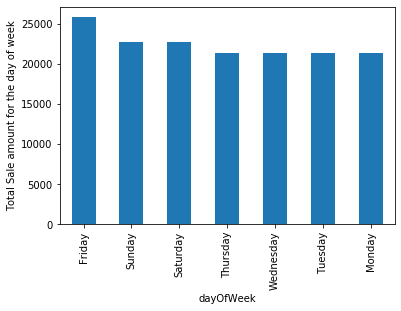

In [6]:
# Plot Averagae number of sales on day of week
data.groupby('dayOfWeek')['totalSellAmount'].count().head(10).sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Total Sale amount for the day of week')

Text(0, 0.5, 'Total sale amount for the day')

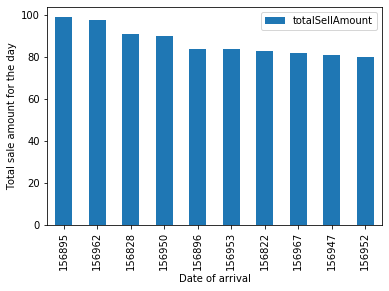

In [7]:
# Plot dates having top sales
data[['dateOfArrival','totalSellAmount']].sort_values(['dateOfArrival', 'totalSellAmount'], ascending = False).head(10).plot( kind = 'bar')
plt.xlabel('Date of arrival')
plt.ylabel('Total sale amount for the day')
#plt.xticks(data['dateOfArrival'].head(10))

In [ ]:
data.head()

In [ ]:
#data = data.drop('Date_Time', axis = 1)
data = data.drop('dateOfArrival', axis = 1)
data = data.drop('timeOfArrival', axis =1)
data = data.drop('Date_Time', axis =1)
data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
data['dayOfWeek'] = labelenc.fit_transform(data['dayOfWeek'])
data.head()

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

In [ ]:
corr = data.corr()
ax = sns.heatmap(
    corr
    ,annot=True
)
plt.figure(figsize = (25,25))
plt.show()

In [ ]:
data.head()